In [ ]:
!pip install resampy

In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
import resampy
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dataset - https://www.kaggle.com/datasets/warcoder/cats-vs-dogs-vs-birds-audio-classification

data = '/content/Audio Classification.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('Extraction Successful')

Extraction Successful


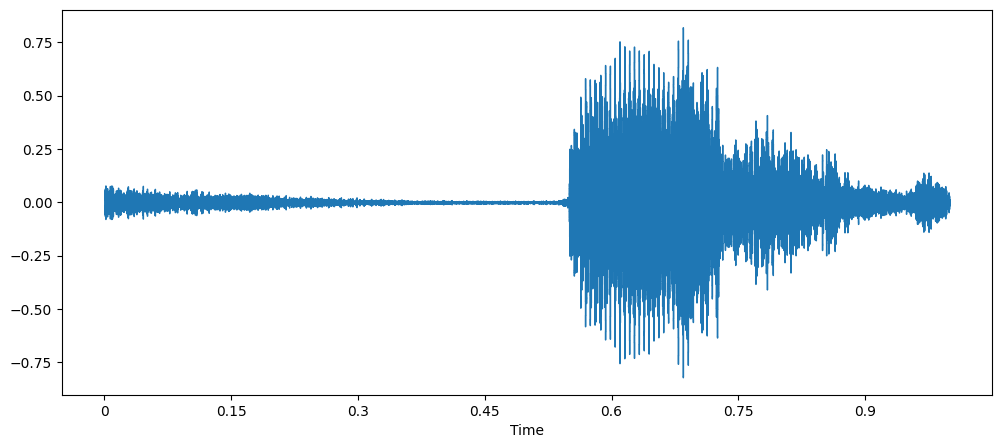

In [ ]:
bird_sample = '/content/Animals/bird/00b01445_nohash_0.wav'

data, sample_rate = librosa.load(bird_sample)
plt.figure(figsize = (12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
Audio(bird_sample)

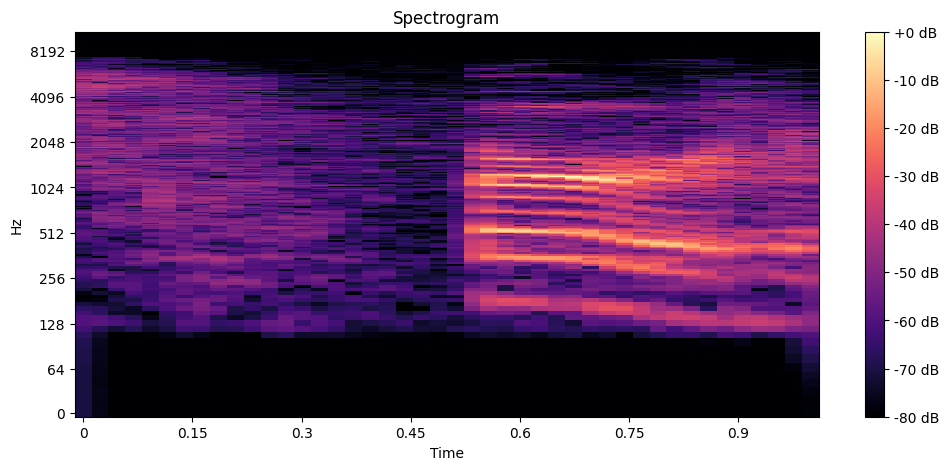

In [ ]:
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

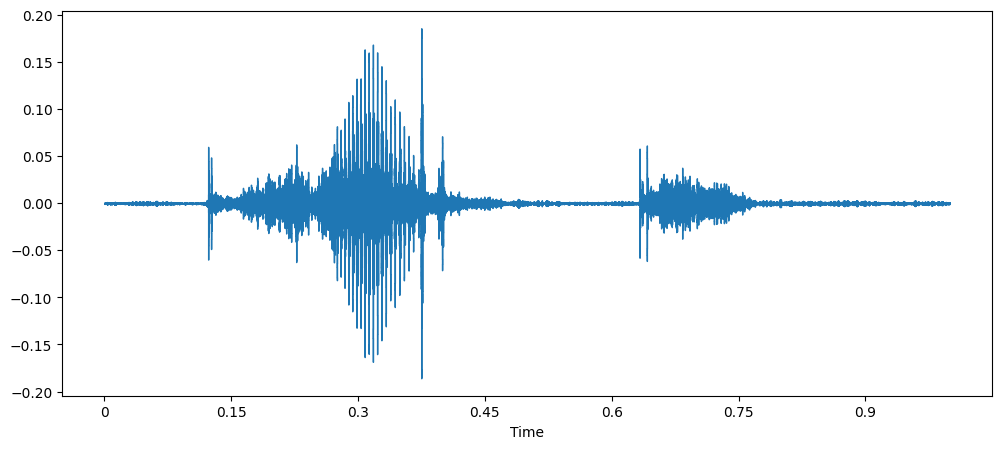

In [ ]:
cat_sample = '/content/Animals/cat/00f0204f_nohash_2.wav'

data, sample_rate = librosa.load(cat_sample)
plt.figure(figsize = (12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
Audio(cat_sample)

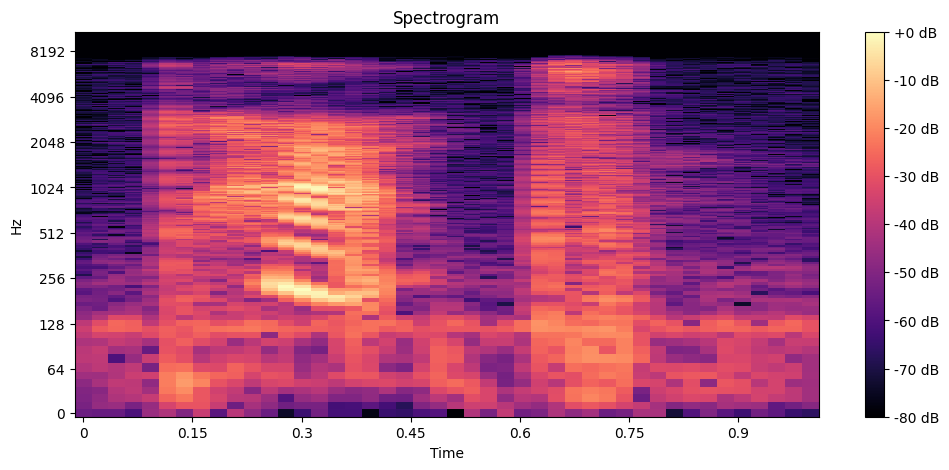

In [ ]:
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

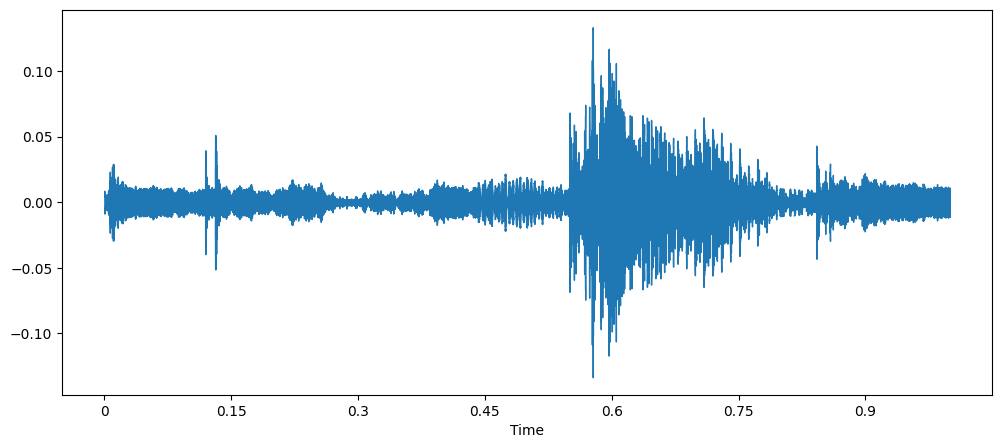

In [ ]:
dog_sample = '/content/Animals/dog/012c8314_nohash_0.wav'

data, sample_rate = librosa.load(dog_sample)
plt.figure(figsize = (12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
Audio(dog_sample)

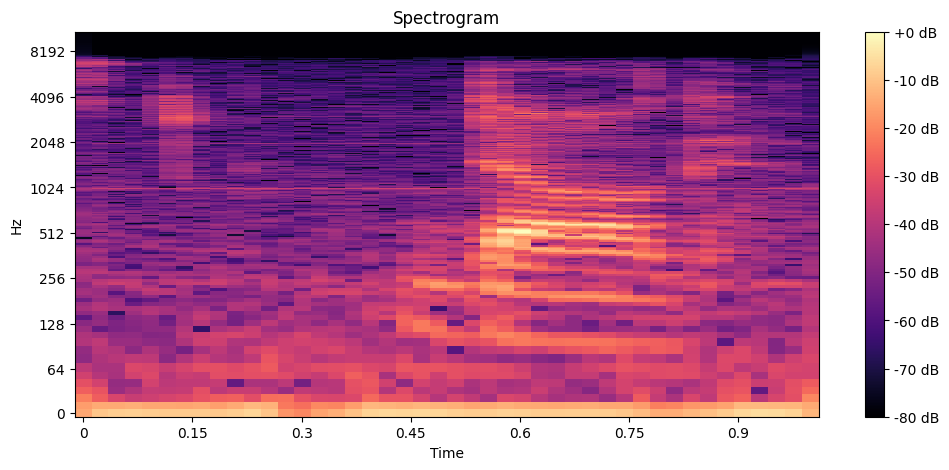

In [ ]:
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [ ]:
def features_extractor(file):
    audio_data, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [ ]:
extracted_features = []
directory = '/content/Animals'

for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        data = features_extractor(file_path)
        extracted_features.append([data, folder])

In [ ]:
df = pd.DataFrame(extracted_features, columns=['Feature', 'Label'])

In [ ]:
df

,Feature,Label
0,"[-393.6841, 123.38118, -23.566236, 52.181168, ...",cat
1,"[-615.6843, 101.908195, -38.54149, 21.172796, ...",cat
2,"[-344.34372, 116.50728, -72.773186, 24.364563,...",cat
3,"[-401.60907, 110.104904, -42.563892, 44.677017...",cat
4,"[-249.10435, 98.988106, -93.22613, 44.778614, ...",cat
...,...,...
605,"[-438.62292, 148.2474, 7.5025315, 5.5204105, -...",dog
606,"[-563.0111, 138.50214, -18.108067, 36.44114, 0...",dog
607,"[-96.63892, 124.40976, -26.635118, 58.45221, -...",dog
608,"[-365.64203, 104.48948, -21.457169, 6.5507464,...",dog


In [ ]:
df.isnull().sum()

,0
Feature,0
Label,0


In [ ]:
df['Label'].unique()

array(['cat', 'bird', 'dog'], dtype=object)

In [ ]:
df['Label'].value_counts()

,count
Label,
dog,210
cat,207
bird,193


In [ ]:
df['Label'] = df['Label'].map({'cat': 0, 'bird': 1, 'dog': 2})

In [ ]:
df

,Feature,Label
0,"[-393.6841, 123.38118, -23.566236, 52.181168, ...",0
1,"[-615.6843, 101.908195, -38.54149, 21.172796, ...",0
2,"[-344.34372, 116.50728, -72.773186, 24.364563,...",0
3,"[-401.60907, 110.104904, -42.563892, 44.677017...",0
4,"[-249.10435, 98.988106, -93.22613, 44.778614, ...",0
...,...,...
605,"[-438.62292, 148.2474, 7.5025315, 5.5204105, -...",2
606,"[-563.0111, 138.50214, -18.108067, 36.44114, 0...",2
607,"[-96.63892, 124.40976, -26.635118, 58.45221, -...",2
608,"[-365.64203, 104.48948, -21.457169, 6.5507464,...",2


In [ ]:
X = np.vstack(df['Feature'].tolist())
y = df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mlp_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - accuracy: 0.2938 - loss: 1.7629 - val_accuracy: 0.6475 - val_loss: 0.9733
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6328 - loss: 0.8913 - val_accuracy: 0.7377 - val_loss: 0.7507
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7021 - loss: 0.7597 - val_accuracy: 0.7213 - val_loss: 0.6328
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7924 - loss: 0.5877 - val_accuracy: 0.8033 - val_loss: 0.5453
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - loss: 0.4738 - val_accuracy: 0.8279 - val_loss: 0.4754
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8349 - loss: 0.3799 - val_accuracy: 0.8115 - val_loss: 0.4953
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9019 - loss: 0.3138 - val_accuracy: 0.7951 - val_loss: 0.4830
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9099 - loss: 0.2853 - val_accuracy: 0.8279 - val_los

In [ ]:
mlp_model.evaluate(X_test_scaled, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8806 - loss: 0.5680 


[0.6948334574699402, 0.8524590134620667]

In [ ]:
y_pred_mlp = mlp_model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [ ]:
print(accuracy_score(y_test, np.argmax(y_pred_mlp, axis=1)))
print(classification_report(y_test, np.argmax(y_pred_mlp, axis=1)))
print(confusion_matrix(y_test, np.argmax(y_pred_mlp, axis=1)))

0.8524590163934426
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        43
           1       0.92      0.92      0.92        39
           2       0.79      0.82      0.80        40

    accuracy                           0.85       122
   macro avg       0.85      0.85      0.85       122
weighted avg       0.85      0.85      0.85       122

[[35  1  7]
 [ 1 36  2]
 [ 5  2 33]]


In [ ]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1, 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1, 1)

In [ ]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (1, 1), activation='relu', input_shape=(X_train_cnn.shape[1], 1, 1)),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Conv2D(64, (1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.2433 - loss: 2.1320 - val_accuracy: 0.4262 - val_loss: 1.3193
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3863 - loss: 1.4135 - val_accuracy: 0.5902 - val_loss: 1.0107
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4413 - loss: 1.2024 - val_accuracy: 0.6557 - val_loss: 0.8784
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5648 - loss: 0.9439 - val_accuracy: 0.7049 - val_loss: 0.7518
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6629 - loss: 0.8260 - val_accuracy: 0.7623 - val_loss: 0.6264
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7163 - loss: 0.6818 - val_accuracy: 0.7787 - val_loss: 0.5788
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7962 - loss: 0.6070 - val_accuracy: 0.8033 - val_loss: 0.5269
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8155 - loss: 0.5465 - val_accuracy: 0.7869 - val_los

In [ ]:
cnn_model.evaluate(X_test_cnn, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8536 - loss: 0.4838 


[0.6633769273757935, 0.8032786846160889]

In [ ]:
y_pred_cnn = cnn_model.predict(X_test_cnn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
print(accuracy_score(y_test, np.argmax(y_pred_cnn, axis=1)))
print(classification_report(y_test, np.argmax(y_pred_cnn, axis=1)))
print(confusion_matrix(y_test, np.argmax(y_pred_cnn, axis=1)))

0.8032786885245902
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.91      0.82      0.86        39
           2       0.74      0.70      0.72        40

    accuracy                           0.80       122
   macro avg       0.81      0.80      0.80       122
weighted avg       0.81      0.80      0.80       122

[[38  1  4]
 [ 1 32  6]
 [10  2 28]]


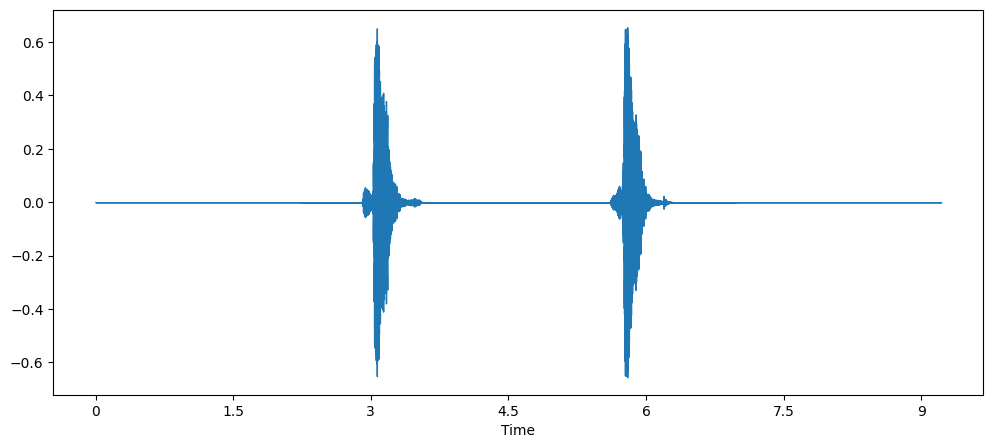

In [ ]:
test_sample = '/content/Sample Bird Pronunciation.mp3'

data, sample_rate = librosa.load(test_sample)
plt.figure(figsize = (12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
Audio(test_sample)

In [ ]:
test_data = features_extractor(test_sample)
test_data = np.array(test_data).reshape(1, -1)
test_data_scaled = scaler.transform(test_data)

In [ ]:
mlp_prediction = mlp_model.predict(test_data_scaled)

cnn_prediction = cnn_model.predict(test_data_scaled.reshape(1, test_data_scaled.shape[1], 1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
np.argmax(mlp_prediction, axis=1)

array([0])